<a href="https://colab.research.google.com/github/EmilSeyfullayev/Tensorflow-Developer-Professional-Certificate/blob/main/Course/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np

In [1]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

2.8.0
11501568/11490434 [==============================] - 0s 0us/step


In [6]:
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.keras.layers import Dense, Flatten

In [5]:
training_images = training_images/255
test_images = test_images/255

In [7]:
model = Sequential([
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation = 'softmax')
])

In [12]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2175 - accuracy: 0.9390
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2026 - accuracy: 0.9438
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1896 - accuracy: 0.9471
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1784 - accuracy: 0.9499
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1682 - accuracy: 0.9535


In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.1631 - accuracy: 0.9527


[0.16309002041816711, 0.9527000188827515]

In [17]:
model.predict(test_images[0:2]) 

array([[4.4357927e-05, 2.7268507e-07, 9.2576735e-04, 4.2909761e-03,
        4.3754676e-07, 2.2010354e-04, 6.9911499e-09, 9.9433315e-01,
        2.5263396e-05, 1.5973690e-04],
       [6.0987659e-04, 1.2723132e-04, 9.8875004e-01, 6.6652051e-03,
        5.6008158e-08, 6.4210373e-04, 1.2590474e-03, 2.0565929e-08,
        1.9462531e-03, 7.4047477e-08]], dtype=float32)

In [18]:
test_images[0:2].shape

(2, 28, 28)

In [19]:
test_images[0].shape

(28, 28)

In [20]:
test_images[0].reshape(-1, 28, 28).shape

(1, 28, 28)

In [24]:
np.argmax( # returns index highest from an array
    model.predict(test_images[0].reshape(-1, 28, 28)) # model cannot predict one picture, because it is 28x28, but we have to have 3 dimensions
) 

7

In [27]:
tf.keras.callbacks.Callback.on_epoch_end.__code__.co_varnames

('self', 'epoch', 'logs')

In [48]:
np.array(dir(tf.keras.callbacks.Callback))

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__',
       '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__',
       '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__',
       '__repr__', '__setattr__', '__sizeof__', '__str__',
       '__subclasshook__', '__weakref__',
       '_implements_predict_batch_hooks', '_implements_test_batch_hooks',
       '_implements_train_batch_hooks', '_keras_api_names',
       '_keras_api_names_v1', 'on_batch_begin', 'on_batch_end',
       'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin',
       'on_predict_batch_end', 'on_predict_begin', 'on_predict_end',
       'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin',
       'on_test_end', 'on_train_batch_begin', 'on_train_batch_end',
       'on_train_begin', 'on_train_end', 'set_model', 'set_params'],
      dtype='<U31')

In [49]:
np.array(dir(tf.keras.callbacks.Callback())) # it has different results because here we initiated the class #particularly we searched for model

array(['__class__', '__delattr__', '__dict__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__',
       '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__',
       '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__',
       '__repr__', '__setattr__', '__sizeof__', '__str__',
       '__subclasshook__', '__weakref__', '_chief_worker_only',
       '_implements_predict_batch_hooks', '_implements_test_batch_hooks',
       '_implements_train_batch_hooks', '_keras_api_names',
       '_keras_api_names_v1', '_supports_tf_logs', 'model',
       'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end',
       'on_predict_batch_begin', 'on_predict_batch_end',
       'on_predict_begin', 'on_predict_end', 'on_test_batch_begin',
       'on_test_batch_end', 'on_test_begin', 'on_test_end',
       'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin',
       'on_train_end', 'set_model', 'set_params', 'validation_data'

In [85]:
np.array(dir(tf.keras.callbacks.Callback().model))

array(['__bool__', '__class__', '__delattr__', '__dir__', '__doc__',
       '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__',
       '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__',
       '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__sizeof__', '__str__', '__subclasshook__'],
      dtype='<U17')

In [64]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


2.8.0
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4744
Epoch 2/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.3567
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3567


In [84]:
np.array(dir(callbacks.model)) # if you have trained model you will have more attributes and methods

array(['_SCALAR_UPRANKING_ON', '_TF_MODULE_IGNORED_PROPERTIES',
       '__call__', '__class__', '__copy__', '__deepcopy__', '__delattr__',
       '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__',
       '__getattribute__', '__getstate__', '__gt__', '__hash__',
       '__init__', '__init_subclass__', '__le__', '__lt__', '__module__',
       '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__',
       '__setattr__', '__setstate__', '__sizeof__', '__str__',
       '__subclasshook__', '__weakref__', '_activity_regularizer',
       '_add_trackable', '_add_trackable_child',
       '_add_variable_with_custom_getter', '_assert_compile_was_called',
       '_assert_weights_created', '_auto_track_sub_layers', '_autocast',
       '_autographed_call', '_base_model_initialized',
       '_build_graph_network_for_inferred_shape', '_build_input_shape',
       '_call_accepts_kwargs', '_call_arg_was_passed',
       '_call_fn_arg_defaults', '_call_fn_arg_positions', '_call_fn_a

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(trainin_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


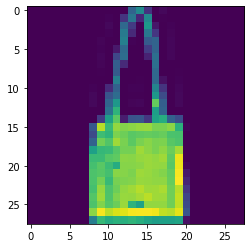

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(trainin_images[200]#, cmap='gray'
           )

In [ ]:
trainin_images[200].shape

(28, 28)

In [ ]:
training_labels[200]

8

In [ ]:
trainin_images[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  82, 122,  37,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  38, 100,  28, 121,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  86,  43,   0, 136,  15,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0, 104,  30,   0, 102,  40,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0, 111,   2,   0,  73,  81,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  17,  87,   0,   0,  45,  81,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,  54,  90,   0,   0,  24,  92,   0,   4,   0

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(trainin_images[200])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,122,37,0,5,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,2,0,38,100,28,121,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,5,0,86,43,0,136,15,0,2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,2,0,104,30,0,102,40,0,3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,3,0,0,111,2,0,73,81,0,4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,2,0,17,87,0,0,45,81,0,4,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,4,0,54,90,0,0,24,92,0,4,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,3,0,76,30,0,0,0,93,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,74,0,0,0,0,86,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,109,0,0,1,0,86,11,0,2,0,0,0,0,0,0,0,0


In [ ]:
# to make sure output gives float we add .0 to 255
train_images_scaled = trainin_images/255.0
test_images_scaled = test_images/255.0

In [ ]:
int(5/1)

5

In [ ]:
0/2

0.0

In [ ]:
np.array(2)/1

2.0

In [ ]:
# see how output is long actually
train_images_scaled[200][24][15]

0.8980392156862745

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(
    optimizer = tf.optimizers.Nadam(),
    loss = tf.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_images_scaled, training_labels,
    validation_data = (test_images_scaled, test_labels),
    epochs = 30, callbacks = [EarlyStopping(patience=2)]
)

Epoch 1/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4590 - accuracy: 0.8347 - val_loss: 0.4223 - val_accuracy: 0.8441
Epoch 2/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3450 - accuracy: 0.8738 - val_loss: 0.3672 - val_accuracy: 0.8658
Epoch 3/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3098 - accuracy: 0.8856 - val_loss: 0.3399 - val_accuracy: 0.8766
Epoch 4/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2855 - accuracy: 0.8931 - val_loss: 0.3366 - val_accuracy: 0.8843
Epoch 5/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2685 - accuracy: 0.9007 - val_loss: 0.3275 - val_accuracy: 0.8822
Epoch 6/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2532 - accuracy: 0.9053 - val_loss: 0.3330 - val_accuracy: 0.8820
Epoch 7/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2419 - accuracy: 0.9097 - val_loss: 0.3637 -

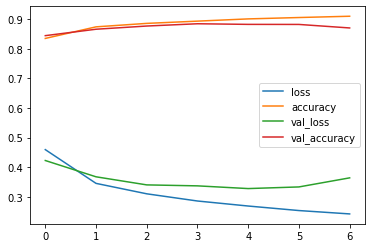

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
classifications = model.predict(test_images_scaled)

In [ ]:
pd.DataFrame(classifications).head(2)

,0,1,2,3,4,5,6,7,8,9
0,3.093725e-08,3.245900e-09,1.583902e-07,3.698303e-10,6.999410e-08,3.974203e-04,1.340191e-07,1.754094e-02,5.063663e-07,9.820608e-01
1,2.015904e-05,1.121512e-15,9.994324e-01,1.421647e-09,2.033552e-04,5.125889e-09,3.440285e-04,1.834630e-15,6.023712e-09,7.107336e-14


In [ ]:
print(classifications[0])

[3.0937251e-08 3.2459002e-09 1.5839016e-07 3.6983028e-10 6.9994101e-08 3.9742028e-04 1.3401912e-07 1.7540935e-02 5.0636635e-07 9.8206079e-01]


In [ ]:
print(test_labels[0])

9


In [ ]:
for i in classifications[0]:
  print(round(i, 3))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.018
0.0
0.982


In [ ]:
classifications_classes = model.predict_classes(test_images_scaled)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
pd.DataFrame(classifications_classes).head(2)

,0
0,9
1,2


In [ ]:
classifications_argmax = np.argmax(
    model.predict(test_images_scaled), axis=-1
)
pd.DataFrame(classifications_argmax).head(2)

,0
0,9
1,2


In [ ]:
x = np.array([[4,2,3], [1,9,3], [3,9,0], [5,9,8]])

In [ ]:
np.argmax(x, axis=0)

array([3, 1, 3])

In [ ]:
np.argmax(x, axis=1)

array([0, 1, 1, 1])

In [ ]:
np.argmax(x, axis=-1)

array([0, 1, 1, 1])

In [ ]:
x.shape

(4, 3)

In [ ]:
x = x.reshape(2, 2, 3)
x

array([[[4, 2, 3],
        [1, 9, 3]],

       [[3, 9, 0],
        [5, 9, 8]]])

In [ ]:
np.argmax(x, axis=1)

array([[0, 1, 0],
       [1, 0, 1]])

In [ ]:
# -1 means last existing shape, if x is 2 dimenasional, then -1 = 1, if three dimensional -1=2 (i.e 0, 1, 2)
# if 4d then -1=3
np.argmax(x, axis=-1)

array([[0, 1],
       [1, 1]])

In [ ]:
np.argmax(x, axis=2)

array([[0, 1],
       [1, 1]])

In [ ]:
# training on not normalized data

model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(128, activation=tf.nn.relu))
model2.add(Dense(10, activation=tf.nn.softmax))

model2.compile(
    optimizer = tf.optimizers.Nadam(),
    loss = tf.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

history_not_normalized = model2.fit(
    trainin_images, training_labels,
    validation_data = (test_images_scaled, test_labels),
    epochs = 30, callbacks = [EarlyStopping(patience=2)]
)

# Accuracy is low

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 3.7673 - accuracy: 0.7043 - val_loss: 2.2384 - val_accuracy: 0.1095
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6201 - accuracy: 0.7829 - val_loss: 2.3258 - val_accuracy: 0.1001
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5449 - accuracy: 0.8102 - val_loss: 2.4384 - val_accuracy: 0.1001


In [ ]:
tf.keras.callbacks.Callback()

tensorflow.python.keras.callbacks.Callback

In [ ]:
# training_finished = False

# class MyCallback(tf.keras.callbacks.Callback):
#    def on_train_end(self, logs=None):
#      global training_finished
#      training_finished = True

# model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=(1,))])
# model.compile(loss='mean_squared_error')
# model.fit(tf.constant([[1.0]]), tf.constant([[1.0]]),
#            callbacks=[MyCallback()])
# assert training_finished == True

In [ ]:
dir(
   tf.keras.callbacks.Callback
)

In [43]:
!pip install see
from see import see

see(
   tf.keras.callbacks.Callback
)

    isclass                    <                          <=
    ==                         !=                         >
    >=                         dir()                      hash()
    help()                     repr()                     str()
    .on_batch_begin()          .on_batch_end()            .on_epoch_begin()
    .on_epoch_end()            .on_predict_batch_begin()
    .on_predict_batch_end()    .on_predict_begin()        .on_predict_end()
    .on_test_batch_begin()     .on_test_batch_end()       .on_test_begin()
    .on_test_end()             .on_train_batch_begin()
    .on_train_batch_end()      .on_train_begin()          .on_train_end()
    .set_model()               .set_params()

In [44]:
from see import see

see(
   tf.keras.callbacks.Callback()
)

    <                         <=                        ==
    !=                        >                         >=
    dir()                     hash()                    help()
    repr()                    str()                     .model
    .on_batch_begin()         .on_batch_end()           .on_epoch_begin()
    .on_epoch_end()           .on_predict_batch_begin()
    .on_predict_batch_end()                             .on_predict_begin()
    .on_predict_end()         .on_test_batch_begin()    .on_test_batch_end()
    .on_test_begin()          .on_test_end()
    .on_train_batch_begin()                             .on_train_batch_end()
    .on_train_begin()         .on_train_end()           .set_model()
    .set_params()             .validation_data

In [ ]:
see(
   model
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1331: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


    ()                       <                        <=
    ==                       !=                       >
    >=                       dir()                    hash()
    help()                   repr()                   str()
    .activity_regularizer    .add()                   .add_loss()
    .add_metric()            .add_update()            .add_variable()
    .add_weight()            .apply()                 .build()
    .built                   .call()                  .compile()
    .compiled_loss()         .compiled_metrics        .compute_dtype
    .compute_mask()          .compute_output_shape()
    .compute_output_signature()                       .count_params()
    .distribute_strategy     .dtype                   .dtype_policy
    .dynamic                 .evaluate()              .evaluate_generator()
    .fit()                   .fit_generator()         .from_config()
    .get_config()            .get_input_at()          .get_input_mask_at()
    .get_input_shape_a

In [ ]:
hash(len)

2837493598382

In [ ]:
trainin_images.shape

(60000, 28, 28)

In [ ]:
pd.DataFrame(history.history).plot()

{}

In [ ]:
classes = np.argmax(model.predict(test_images), axis=-1)

In [ ]:
pd.DataFrame(classes)

,0
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


In [ ]:
probabilities = model.predict(test_images)

In [ ]:
probabilities[0][-1]

0.999998

# Custom Callbacks
### tf.kears.activations.relu - this is preferred with Suquential models
### tf.nn.relu - this can be y = tf.nn.relu(x) - activations word is not used

In [ ]:
import tensorflow as tf

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get("accuracy")) >= 0.9:
      self.model.stop_training = True

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation=tf.keras.activations.selu))
model.add(Dense(10, tf.keras.activations.softmax))

In [ ]:
tf.nn.ac

In [ ]:
model.compile(optimizer=tf.optimizers.Nadam(),
              loss = tf.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
callback = myCallback()

In [ ]:
history = model.fit(
    x_train, y_train, validation_data = (x_test, y_test), callbacks=[callback],
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3012 - accuracy: 0.8893 - val_loss: 0.3723 - val_accuracy: 0.8641
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2850 - accuracy: 0.8945 - val_loss: 0.3370 - val_accuracy: 0.8784
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2723 - accuracy: 0.8990 - val_loss: 0.3356 - val_accuracy: 0.8787
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2619 - accuracy: 0.9028 - val_loss: 0.3309 - val_accuracy: 0.8791


# Using Convolutions and MaxPooling

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.5.0
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)         

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, validation_data = (test_images, test_labels),epochs=30, 
          callbacks = [EarlyStopping(patience=2)])
test_loss = model.evaluate(test_images, test_labels)

2.5.0
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1639424   
_________________________________________________________________
dense_11 (Dense)             (None, 10)         

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
import numpy as np

In [ ]:
x = np.array([[1,2], [2,3], [3,4]])

In [ ]:
x.shape

(3, 2)

In [ ]:
x.reshape(3,2,1)

array([[[1],
        [2]],

       [[2],
        [3]],

       [[3],
        [4]]])

In [ ]:
x.reshape(3,2,1,1)

array([[[[1]],

        [[2]]],


       [[[2]],

        [[3]]],


       [[[3]],

        [[4]]]])

In [ ]:
x.reshape(3,2,1,1).shape

(3, 2, 1, 1)

In [ ]:
x

array([[1, 2],
       [2, 3],
       [3, 4]])

In [ ]:
x.reshape(1,3,2)

array([[[1, 2],
        [2, 3],
        [3, 4]]])

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='selu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='nadam', loss=tf.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15,
          callbacks=[EarlyStopping(patience=3)])

Epoch 1/15
1875/1875 [==============================] - 118s 62ms/step - loss: 0.6880 - accuracy: 0.7428 - val_loss: 0.5380 - val_accuracy: 0.7988
Epoch 2/15
1875/1875 [==============================] - 115s 61ms/step - loss: 0.4558 - accuracy: 0.8378 - val_loss: 0.4504 - val_accuracy: 0.8389
Epoch 3/15
1875/1875 [==============================] - 115s 61ms/step - loss: 0.3981 - accuracy: 0.8561 - val_loss: 0.4127 - val_accuracy: 0.8563
Epoch 4/15
1875/1875 [==============================] - 114s 61ms/step - loss: 0.3638 - accuracy: 0.8699 - val_loss: 0.3894 - val_accuracy: 0.8633
Epoch 5/15
1875/1875 [==============================] - 114s 61ms/step - loss: 0.3373 - accuracy: 0.8777 - val_loss: 0.3634 - val_accuracy: 0.8719
Epoch 6/15
1875/1875 [==============================] - 114s 61ms/step - loss: 0.3173 - accuracy: 0.8853 - val_loss: 0.3461 - val_accuracy: 0.8749
Epoch 7/15
1875/1875 [==============================] - 114s 61ms/step - loss: 0.3030 - accuracy: 0.8891 - val_loss: 0

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.688023,0.742800,0.538008,0.7988
1,0.455817,0.837817,0.450429,0.8389
2,0.398103,0.856150,0.412701,0.8563
3,0.363798,0.869917,0.389413,0.8633
4,0.337307,0.877700,0.363422,0.8719
5,0.317272,0.885317,0.346081,0.8749
6,0.303000,0.889067,0.332987,0.8804
7,0.290652,0.892717,0.317472,0.8884
8,0.280550,0.896200,0.348212,0.8743
9,0.269032,0.901417,0.343846,0.8762


In [ ]:
import matplotlib.pyplot as plt

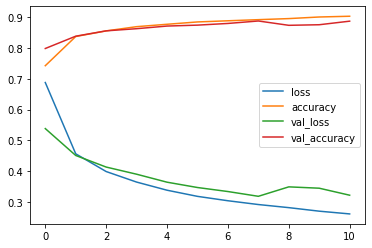

In [ ]:
pd.DataFrame(history.history).plot()